<a href="https://colab.research.google.com/github/Shantnu-Talokar/DeepLearningLab/blob/main/DLPractical8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split the full training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Testing data shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (48000, 28, 28)
Validation data shape: (12000, 28, 28)
Testing data shape: (10000, 28, 28)


In [2]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
from tensorflow.keras.models import Model

# Define the input layer
input_img = Input(shape=(28, 28))

# Build the encoder
flat_img = Flatten()(input_img)
encoded = Dense(128, activation='relu')(flat_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded) # Latent space representation

# Build the decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(28 * 28, activation='sigmoid')(decoded) # Output layer for reconstruction

# Reshape the output
decoded = Reshape((28, 28))(decoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Print the model summary
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_val, x_val))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.3582 - val_loss: 0.1773
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1658 - val_loss: 0.1457
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1398 - val_loss: 0.1302
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.1280 - val_loss: 0.1225
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1208 - val_loss: 0.1169
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1153 - val_loss: 0.1128
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1119 - val_loss: 0.1098
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1084 - val_loss: 0.1072
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1066 - val_loss: 0.1051
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.1041 - val_loss: 0.1034


Test loss: 0.10179527848958969
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


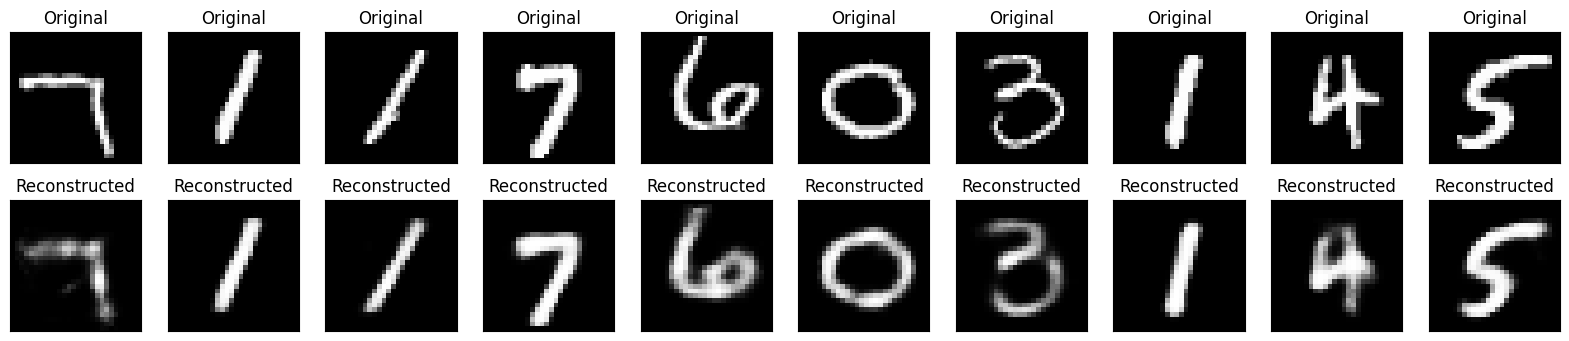

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the autoencoder model on the test data
test_loss = autoencoder.evaluate(x_test, x_test, verbose=0)
print(f"Test loss: {test_loss}")

# Predict reconstructed images for the test data
reconstructed_images = autoencoder.predict(x_test)

# Select a few sample images
n_samples = 10
sample_indices = np.random.choice(len(x_test), n_samples, replace=False)
original_samples = x_test[sample_indices]
reconstructed_samples = reconstructed_images[sample_indices]

# Plot original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(n_samples):
    # Display original
    ax = plt.subplot(2, n_samples, i + 1)
    plt.imshow(original_samples[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Original")

    # Display reconstruction
    ax = plt.subplot(2, n_samples, i + 1 + n_samples)
    plt.imshow(reconstructed_samples[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Reconstructed")
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


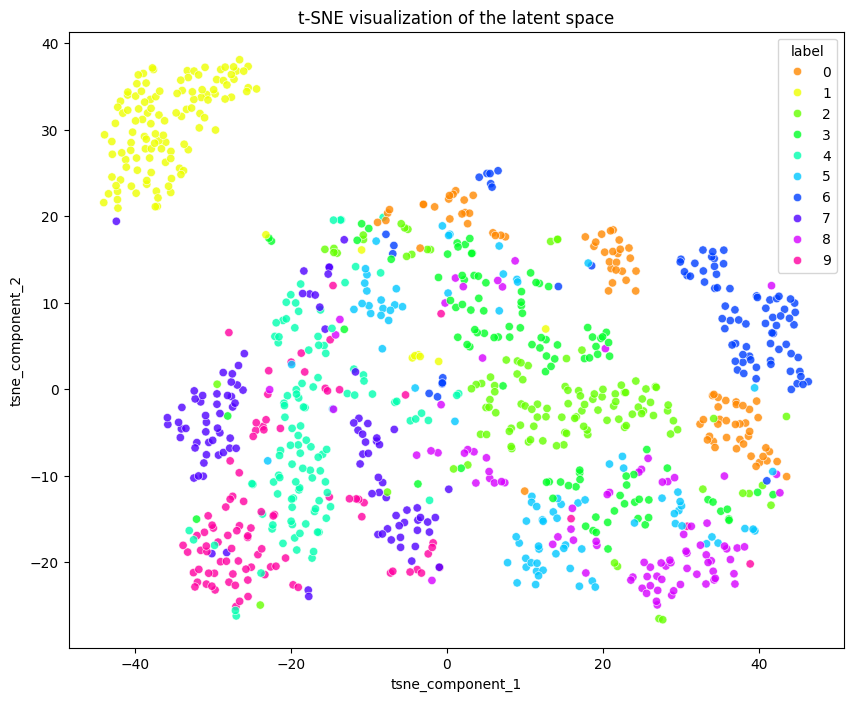

In [5]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

# Create the encoder model
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('dense_2').output) # 'dense_2' is the name of the latent space layer

# Predict the latent space representation for a subset of the test data
n_samples_tsne = 1000
test_subset = x_test[:n_samples_tsne]
test_subset_labels = y_test[:n_samples_tsne]
latent_representation = encoder.predict(test_subset)

# Apply t-SNE for dimensionality reduction to 2 components
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(latent_representation)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne_component_1', 'tsne_component_2'])
tsne_df['label'] = test_subset_labels

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="tsne_component_1", y="tsne_component_2",
    hue="label",
    palette=sns.color_palette("hsv", 10),
    data=tsne_df,
    legend="full",
    alpha=0.8
)
plt.title('t-SNE visualization of the latent space')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The MNIST dataset was successfully loaded, normalized to the range [0, 1], and split into training (48000 samples), validation (12000 samples), and testing (10000 samples) sets.
*   An autoencoder model was built using TensorFlow/Keras, consisting of an encoder with Dense layers reducing the dimensionality to 32 in the latent space, and a decoder reconstructing the image with Dense layers and a final sigmoid activation.
*   The autoencoder was compiled with the Adam optimizer and binary cross-entropy loss and trained for 10 epochs, showing a decrease in both training and validation loss.
*   The autoencoder achieved a test loss of approximately 0.1018, indicating its ability to reconstruct test images.
*   Visual inspection of original and reconstructed images demonstrated that the autoencoder could produce recognizable digit reconstructions.
*   A t-SNE visualization of the 32-dimensional latent space, reduced to 2 dimensions, showed that the autoencoder learned a representation where different digit classes are largely separable.

### Insights or Next Steps

*   The learned latent space effectively captures discriminative features of the handwritten digits, making it suitable for tasks like classification or further analysis in a lower-dimensional space.
*   Further experimentation could involve tuning the autoencoder's architecture (e.g., number of layers, units, activation functions) or training parameters (e.g., epochs, batch size, optimizer learning rate) to potentially improve reconstruction quality or the separability of classes in the latent space.
